In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
c_df = pd.read_csv("Country-data.csv")
c_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
print(c_df.shape)
print(c_df.describe())
print(c_df.info())

(167, 10)
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1

In [5]:
#Checking for null data
print(c_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [6]:
#Changing the % to actual values for exports, health, imports per person
c_df['exports'] = (c_df['exports']/100)*c_df['gdpp']
c_df['imports'] = (c_df['imports']/100)*c_df['gdpp']
c_df['health'] = (c_df['health']/100)*c_df['gdpp']

In [7]:
#Since we do not have any null value, we can perform furthur

copy = c_df.copy()
print(copy.head())
#Removing the country column to apply scaler
copy.pop('country')

               country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
7                           Australia
8                             Austria
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
15                            Belgium
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26          

In [8]:
print(copy.head())
#doing standard scaling
sr_sc = StandardScaler()
# applying standard scaler
scaled_df = sr_sc.fit_transform(copy)
scaled_df[:5,:]

   child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  


array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

## Applying the pca

In [9]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42,svd_solver='auto')

In [10]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [12]:
#Let's check the explained variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [13]:
#Finding the cumulative explained variance ratio
cumu_var = np.cumsum(pca.explained_variance_ratio_)
cumu_var

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

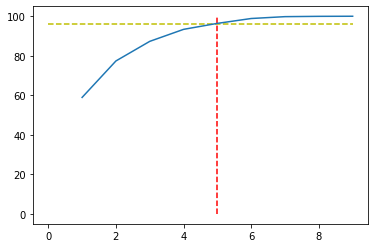

In [14]:
#Scree plot

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,len(cumu_var)+1), cumu_var*100)
plt.vlines(5,0,100,colors='r',linestyles='--')
plt.hlines(96,0,9,colors='y',linestyles='--')

In [15]:
#From the scree plot it can be clearly seen that with 5 PC's we are reaching ~96% information
#we can keep the PC count to 5
pca5 = PCA(n_components=5,random_state=42,svd_solver='auto')

In [16]:
final=pca5.fit_transform(scaled_df)
final.shape

(167, 5)

### Making dataframe for it

In [17]:
df_pca = pd.DataFrame(final , columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
print(df_pca.head())
print(df_pca.shape)

        PC1       PC2       PC3       PC4       PC5
0 -2.635575  1.472267 -0.549489 -0.242326  0.023530
1 -0.024206 -1.429892 -0.014123  0.450645 -0.125821
2 -0.459557 -0.675495  0.959355  0.218456 -0.113275
3 -2.722630  2.172332  0.600215 -0.433978  0.005433
4  0.648597 -1.023437 -0.257430  0.289201  0.072694
(167, 5)


In [18]:
df_pca['country'] = c_df['country']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,Albania
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria
3,-2.722630,2.172332,0.600215,-0.433978,0.005433,Angola
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda


## Performing outlier analysis

#### We are going to check with IQR method

-1.4472944810041746 0.8494138544737703
44         Denmark
73         Ireland
91      Luxembourg
110    Netherlands
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object
country       Denmark
child_mort        4.1
exports         29290
health           6612
imports         25288
income          44000
inflation        3.22
life_expec       79.5
total_fer        1.87
gdpp            58000
Name: 44, dtype: object
country       Ireland
child_mort        4.2
exports         50161
health        4475.53
imports       42125.5
income          45700
inflation       -3.22
life_expec       80.4
total_fer        2.05
gdpp            48700
Name: 73, dtype: object
country       Luxembourg
child_mort           2.8
exports           183750
health            8158.5
imports           149100
income             91700
inflation           3.62
life_expec          81.3
total_fer           1.63
gdpp              105000
Name: 91, dtype: object
country       Neth

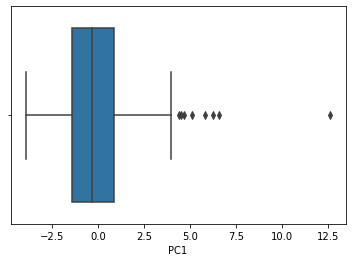

In [19]:
import seaborn as sns
sns.boxplot(x=df_pca['PC1'])
q1 = df_pca["PC1"].quantile(0.25)
q3 = df_pca['PC1'].quantile(0.75)
print(q1,q3)
iqr = q3 - q1
outlier = df_pca[(df_pca['PC1']>q3+1.5*iqr) | (df_pca['PC1']<q1-1.5*iqr)]['country']
print(outlier)
for i in outlier.index:
    print(c_df.loc[i,:])

#### Here it seems that countries themselves belong to small and rich countries group
#### It may not be feasible to remove these 

-0.9750541223222987 0.68004278512882
91     Luxembourg
113       Nigeria
Name: country, dtype: object
country       Luxembourg
child_mort           2.8
exports           183750
health            8158.5
imports           149100
income             91700
inflation           3.62
life_expec          81.3
total_fer           1.63
gdpp              105000
Name: 91, dtype: object
country       Nigeria
child_mort        130
exports        589.49
health        118.131
imports        405.42
income           5150
inflation         104
life_expec       60.5
total_fer        5.84
gdpp             2330
Name: 113, dtype: object


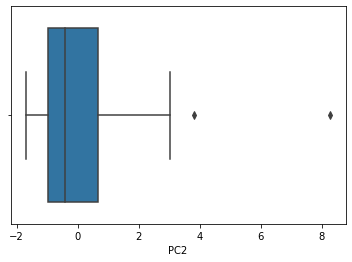

In [20]:
sns.boxplot(x=df_pca['PC2'])
q1 = df_pca["PC2"].quantile(0.25)
q3 = df_pca['PC2'].quantile(0.75)
print(q1,q3)
iqr = q3 - q1
outlier = df_pca[(df_pca['PC2']>q3+1.5*iqr) | (df_pca['PC2']<q1-1.5*iqr)]['country']
print(outlier)
for i in outlier.index:
    print(c_df.loc[i,:])

#### Here we may remove these countries but again these are not looking to fall under a single category, Let's not remove them
#### these are highly distant  Luxembourg seems to be too developed and Nigeria having very low chid mortality

-0.40104818869383496 0.2557727028640301
5                     Argentina
23                       Brunei
31     Central African Republic
66                        Haiti
103                    Mongolia
113                     Nigeria
128                Saudi Arabia
140                   Sri Lanka
149                 Timor-Leste
163                   Venezuela
Name: country, dtype: object
country       Argentina
child_mort         14.5
exports          1946.7
health            834.3
imports            1648
income            18700
inflation          20.9
life_expec         75.8
total_fer          2.37
gdpp              10300
Name: 5, dtype: object
country        Brunei
child_mort       10.5
exports       23792.2
health        1002.52
imports          9884
income          80600
inflation        16.7
life_expec       77.1
total_fer        1.84
gdpp            35300
Name: 23, dtype: object
country       Central African Republic
child_mort                         149
exports                   

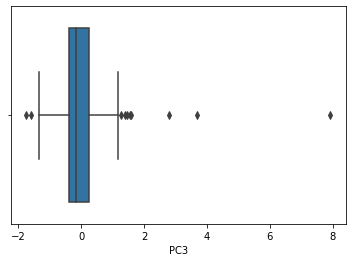

In [21]:
sns.boxplot(x=df_pca['PC3'])
q1 = df_pca["PC3"].quantile(0.25)
q3 = df_pca['PC3'].quantile(0.75)
print(q1,q3)
iqr = q3 - q1
outlier = df_pca[(df_pca['PC3']>q3+1.5*iqr) | (df_pca['PC3']<q1-1.5*iqr)]['country']
print(outlier)
for i in outlier.index:
    print(c_df.loc[i,:])

#### Now these outliers seem to be of developing countries. We will not remove them

-0.23458811923661577 0.3461696728990783
7          Australia
29            Canada
44           Denmark
54            France
58           Germany
77             Japan
91        Luxembourg
98             Malta
114           Norway
133        Singapore
144           Sweden
145      Switzerland
159    United States
Name: country, dtype: object
country       Australia
child_mort          4.8
exports         10276.2
health          4530.87
imports         10847.1
income            41400
inflation          1.16
life_expec           82
total_fer          1.93
gdpp              51900
Name: 7, dtype: object
country        Canada
child_mort        5.6
exports       13793.4
health         5356.2
imports         14694
income          40700
inflation        2.87
life_expec       81.3
total_fer        1.63
gdpp            47400
Name: 29, dtype: object
country       Denmark
child_mort        4.1
exports         29290
health           6612
imports         25288
income          44000
inflation        3.

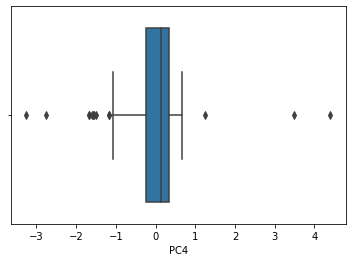

In [22]:
sns.boxplot(x=df_pca['PC4'])
q1 = df_pca["PC4"].quantile(0.25)
q3 = df_pca['PC4'].quantile(0.75)
print(q1,q3)
iqr = q3 - q1
outlier = df_pca[(df_pca['PC4']>q3+1.5*iqr) | (df_pca['PC4']<q1-1.5*iqr)]['country']
print(outlier)
for i in outlier.index:
    print(c_df.loc[i,:])

#### These also belong to rich developed countries. Not removing

-0.19650237383808777 0.08998912372768073
11                  Bahrain
23                   Brunei
44                  Denmark
49        Equatorial Guinea
66                    Haiti
82                   Kuwait
91               Luxembourg
110             Netherlands
113                 Nigeria
115                    Oman
123                   Qatar
128            Saudi Arabia
133               Singapore
145             Switzerland
157    United Arab Emirates
159           United States
Name: country, dtype: object
country       Bahrain
child_mort        8.6
exports       14386.5
health        1028.79
imports       10536.3
income          41100
inflation        7.44
life_expec         76
total_fer        2.16
gdpp            20700
Name: 11, dtype: object
country        Brunei
child_mort       10.5
exports       23792.2
health        1002.52
imports          9884
income          80600
inflation        16.7
life_expec       77.1
total_fer        1.84
gdpp            35300
Name: 23, dtype: o

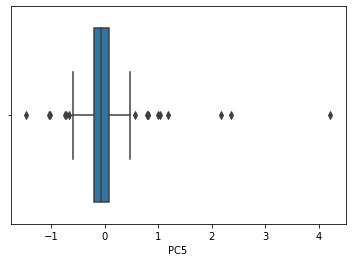

In [23]:
sns.boxplot(x=df_pca['PC5'])
q1 = df_pca["PC5"].quantile(0.25)
q3 = df_pca['PC5'].quantile(0.75)
print(q1,q3)
iqr = q3 - q1
outlier = df_pca[(df_pca['PC5']>q3+1.5*iqr) | (df_pca['PC5']<q1-1.5*iqr)]['country']
print(outlier)
for i in outlier.index:
    print(c_df.loc[i,:])

#### These seem to be belonging to either very developed or least developed, they'll themselves fall in different clusters 
#### Not removing any

## Checking whether to apply clustering for this data using hopkin's method

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [25]:
#Check using Hopkin's test
df_pca1=df_pca[['PC1','PC2','PC3','PC4','PC5']]
print(hopkins(df_pca1))

0.9369863795981708


In [26]:
# Since Hopkin's test is very good (above 90% most of the times), we can proceed for clustering

#We need to check for number of clusters required using 2 tests, silhouette and elbow

### elbow-curve/SSD

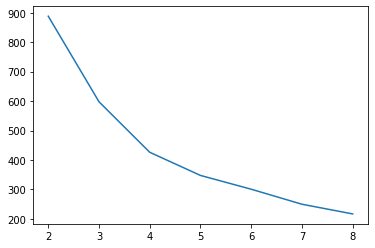

In [27]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range(2,9),ssd)


In [28]:
## From this we can see that elbow is stabilising at k=4

### silhouette analysis

[0.4805572698121071, 0.45394742677939093, 0.46270035395544096, 0.46469876154257594, 0.4314019748119281, 0.35881127795113565, 0.35370995800425303]


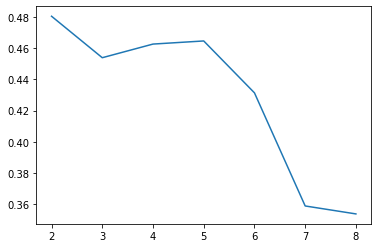

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
l = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca1, cluster_labels)
    l.append(silhouette_avg)
print(l)
plt.plot(range(2,9),l)

In [30]:
# Here also k=4 seems quite reasonable

#We will move forward with k=4

## K-Means Clustering

In [31]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_pca1)
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 3, 0, 0, 1, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [32]:
#appending the labels to data_frame
df_pca['kmeans_label'] = kmeans.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country,kmeans_label
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,Afghanistan,0
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,Albania,1
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275,Algeria,1
3,-2.722630,2.172332,0.600215,-0.433978,0.005433,Angola,0
4,0.648597,-1.023437,-0.257430,0.289201,0.072694,Antigua and Barbuda,1


In [33]:
#Let's have a look on number of elements in clusters
df_pca['kmeans_label'].value_counts()

1    87
0    48
3    30
2     2
Name: kmeans_label, dtype: int64

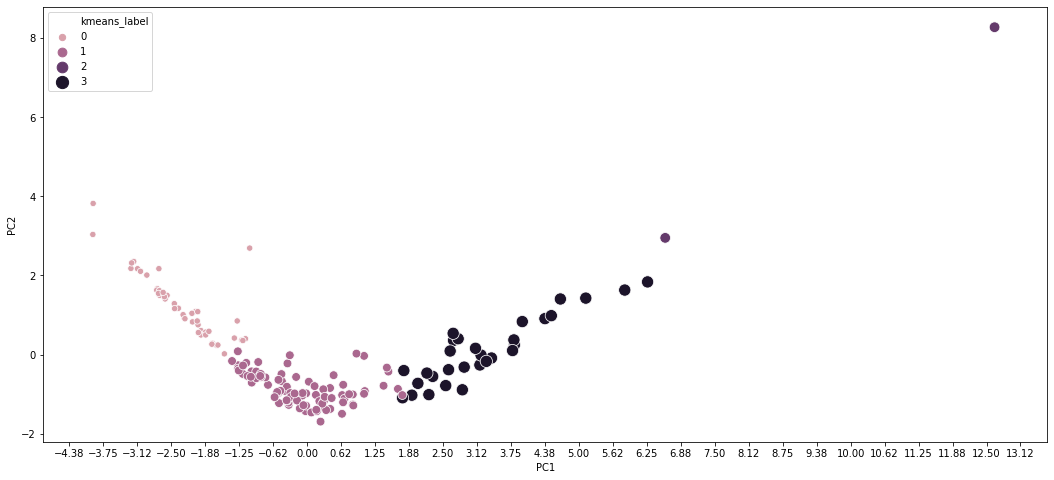

In [34]:
#Let's have a look on scatter plot of first 2 Principle Components
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-5, 18, 0.625))
cmap = sns.cubehelix_palette(dark=.1, light=.7, as_cmap=True)
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='kmeans_label', legend = 'full', data = df_pca, size="kmeans_label",
                palette=cmap,sizes=(40,150))

### Cluster Profiling

In [35]:
#Let's merge the cluster labels to original dataframe
c_df = pd.merge(c_df, df_pca, how = 'inner', on = 'country')
c_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,0.023530,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,-0.113275,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,0.005433,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,0.072694,1


In [36]:
#Thus we assigned cluster labels to each of the countries


## Analysis

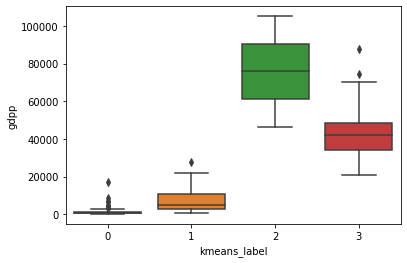

In [37]:
#Now plotting for various indicators like gdpp, child_mort and income
# We will use box plots

#gdpp
sns.boxplot(x='kmeans_label', y='gdpp', data=c_df)

In [38]:
#This can be clearly seen in the plot that countries having low gdpp are in the cluster 0 and 2

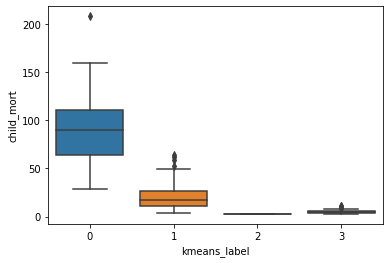

In [39]:
#child_mort
sns.boxplot(x='kmeans_label', y='child_mort', data=c_df)

In [40]:
# It is evident here in the plot that same group(0 and 2) have high child mortality than other groups

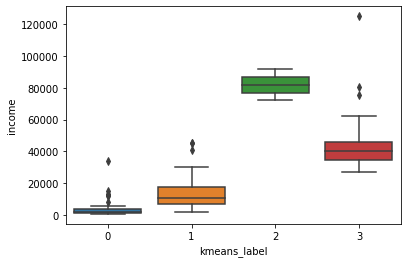

In [41]:
#income
sns.boxplot(x='kmeans_label', y='income', data=c_df)

In [42]:
#We again see the disparity in same groups (0 and 2)
#Thus here we see that countries under clusters 0 and 2 need to be paid attention

In [43]:
#number of countries in cluster 2
c_df[(c_df['kmeans_label']==2)] # | (c_df['kmeans_label']==1)])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000,12.648065,8.276683,-0.619787,4.398488,-1.469763,2
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600,6.590407,2.950919,-0.320267,3.485423,0.571097,2


## Heirarchical Clustering

In [44]:
df_pca1.head()
#print(len(df_pca1))

,PC1,PC2,PC3,PC4,PC5
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821
2,-0.459557,-0.675495,0.959355,0.218456,-0.113275
3,-2.722630,2.172332,0.600215,-0.433978,0.005433
4,0.648597,-1.023437,-0.257430,0.289201,0.072694


In [45]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

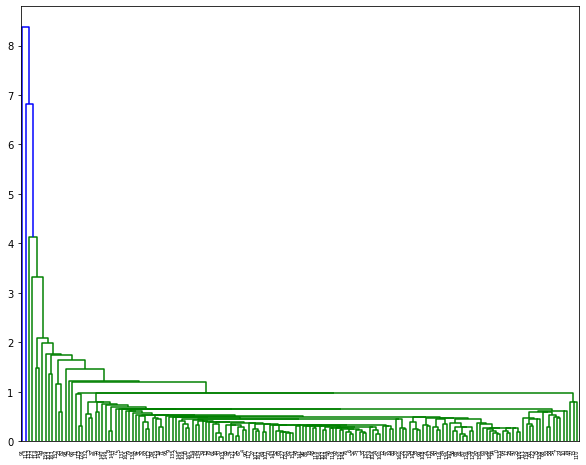

In [46]:
# single linkage
plt.figure(figsize=(10,8))
mergings = linkage(df_pca1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [47]:
#4-clusters
cluster_labels_single = cut_tree(mergings, n_clusters=4)
cluster_labels_single = cluster_labels_single.reshape(-1,)
print(cluster_labels_single)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Cluster Profiling

In [48]:
c_df['cluster_labels_single'] = cluster_labels_single

In [49]:
#Let's have a look on number of elements in clusters
print(c_df['kmeans_label'].value_counts())
print(c_df['cluster_labels_single'].value_counts())

1    87
0    48
3    30
2     2
Name: kmeans_label, dtype: int64
0    164
3      1
2      1
1      1
Name: cluster_labels_single, dtype: int64


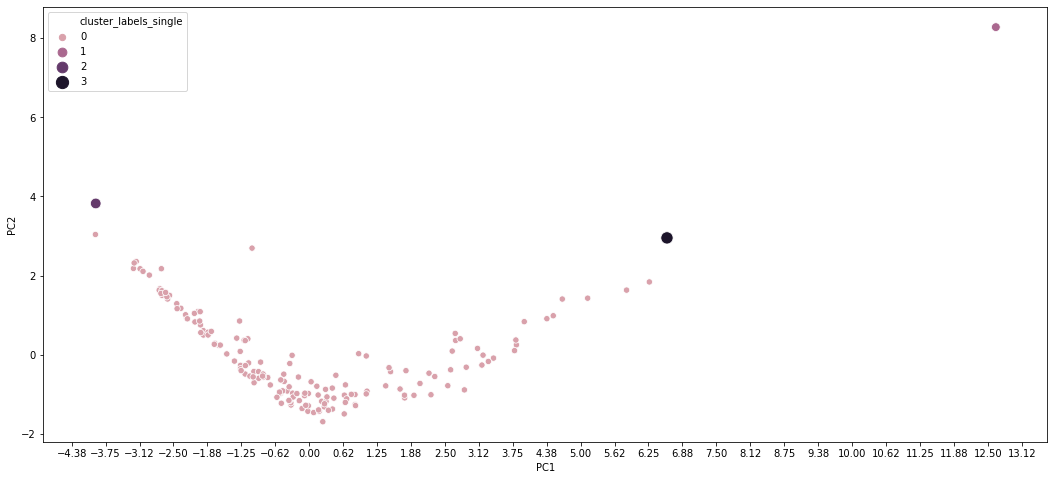

In [50]:
#Let's have a look on scatter plot of first 2 Principle Components
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-5, 18, 0.625))
cmap = sns.cubehelix_palette(dark=.1, light=.7, as_cmap=True)
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='cluster_labels_single', legend = 'full', data = c_df, size="cluster_labels_single",
                palette=cmap,sizes=(40,150))

#### Complete linkage

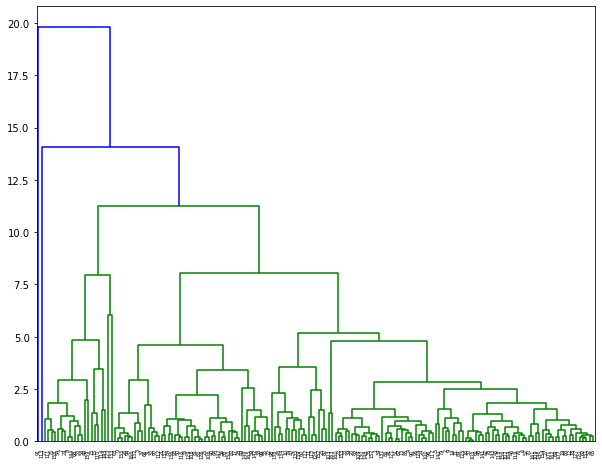

In [51]:
# complete linkage
plt.figure(figsize=(10,8))
mergings_c = linkage(df_pca1, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

In [58]:
# 4 clusters
cluster_labels_complete = cut_tree(mergings_c, n_clusters=6)
cluster_labels_complete = cluster_labels_complete.reshape(-1,)
print(cluster_labels_complete)


[0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 1 1 1 0 0 1 0 1 2 1 1 1 0 2
 1 2 1 2 1 1 0 0 1 1 0 1 1 0 0 1 1 3 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 4 2 1 0 1 1 1 1 1 1 5 1 1 0 1 1 0 1 1 0 5 1 1 0 0 1 1 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 1 2 2 1 1 1 1 1 0 0]


### Cluster Profiling

In [59]:
c_df['cluster_labels_complete'] = cluster_labels_complete

In [60]:
#Let's have a look on number of elements in clusters
print(c_df['kmeans_label'].value_counts())
print(c_df['cluster_labels_complete'].value_counts())

1    87
0    48
3    30
2     2
Name: kmeans_label, dtype: int64
1    97
0    47
2    19
5     2
4     1
3     1
Name: cluster_labels_complete, dtype: int64


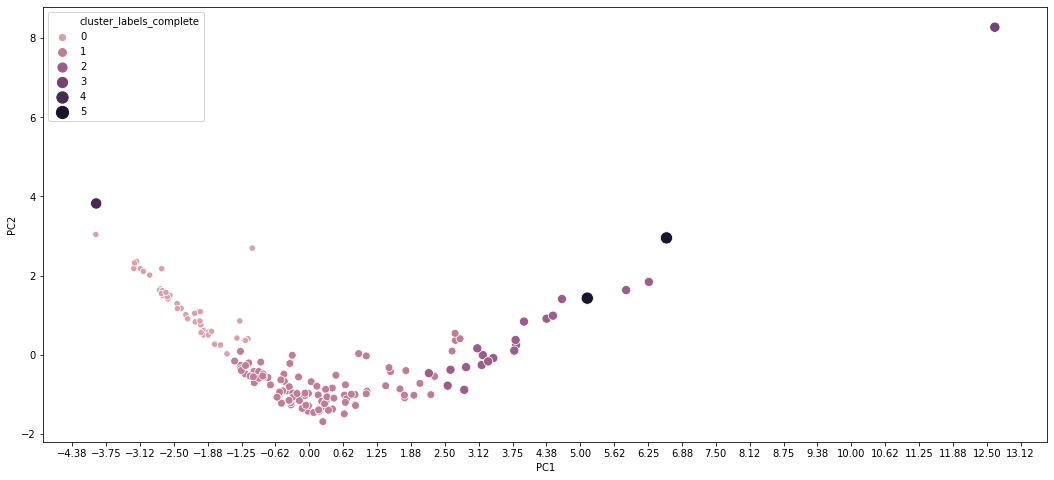

In [61]:
#Let's have a look on scatter plot of first 2 Principle Components
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-5, 18, 0.625))
cmap = sns.cubehelix_palette(dark=.1, light=.7, as_cmap=True)
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='cluster_labels_complete', legend = 'full', data = c_df, size="cluster_labels_complete",
                palette=cmap,sizes=(40,150))

## We will not be moving forward with any hierarchical clustering since the transformed data is not in the pattern of separate clusters being very far from each other

## Rather, all points can be seen if we draw a parabolic like curve 

## Thus heirarchical clustering will always start taking clusters from far off points and put all the bottom points in a single cluster
## which is seen in the graphs above

## In contrast the k means clustering is giving better clustering results.

In [114]:
#Finding the countries requiring most help from k-means cluster#2

help_countries = c_df[(c_df['kmeans_label']==2)]
print(help_countries.head())
print(len(help_countries))

         country  child_mort   exports    health   imports  income  inflation  \
0    Afghanistan        90.2    55.300   41.9174   248.297    1610      9.440   
3         Angola       119.0  2199.190  100.6050  1514.370    5900     22.400   
17         Benin       111.0   180.404   31.0780   281.976    1820      0.885   
21      Botswana        52.5  2768.600  527.0500  3257.550   13300      8.920   
25  Burkina Faso       116.0   110.400   38.7550   170.200    1430      6.810   

    life_expec  total_fer  gdpp       PC1       PC2       PC3       PC4  \
0         56.2       5.82   553 -2.635575  1.472267 -0.549489 -0.242326   
3         60.1       6.16  3530 -2.722630  2.172332  0.600215 -0.433978   
17        61.8       5.36   758 -2.363962  1.171696 -1.247192 -0.257106   
21        57.1       2.88  6350 -1.129489  0.401611 -0.231994  0.102647   
25        57.9       5.87   575 -2.751480  1.664991 -0.848207 -0.345046   

         PC5  kmeans_label  cluster_labels_single  cluster_lab

In [115]:
# We want top 10 countries from this group based on the gdpp, income and child_mort

#based on gdpp
help_gdpp = help_countries.sort_values("gdpp", axis = 0, ascending = True)[:10]
help_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label,cluster_labels_single,cluster_labels_complete
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,-1.996653,0.557492,-0.338898,0.036964,-0.103972,2,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,-2.708924,1.498580,-0.357332,-0.157729,0.030791,2,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,-1.948339,0.496371,-0.039610,0.052654,-0.170251,2,0,0


In [116]:
# The countries requiring immediate assistance for gdpp are mentioned above

In [117]:
#based on income
help_income = help_countries.sort_values("income", axis = 0, ascending = True)[:10]
help_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label,cluster_labels_single,cluster_labels_complete
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,-2.708924,1.498580,-0.357332,-0.157729,0.030791,2,0,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,-2.712585,1.614803,0.041301,-0.242720,-0.054804,2,0,0
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,-2.243462,0.906540,-1.191994,-0.096680,0.083652,2,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0


In [118]:
#based on child_mort
help_child_mort = help_countries.sort_values("child_mort", axis = 0, ascending = False)[:10]
help_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label,cluster_labels_single,cluster_labels_complete
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,-3.937287,3.036998,-1.756335,-0.266013,0.817972,2,0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,-3.185395,2.354073,-1.078613,-0.567728,0.211301,2,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,-2.944260,2.010103,-1.142610,-0.521593,0.153789,2,0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,-3.931802,3.821230,7.928939,-0.540160,-1.044552,2,2,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,0.005433,2,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,-2.751480,1.664991,-0.848207,-0.345046,0.087577,2,0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0


In [127]:
#Finding common in pairwise 2
help_final={}
from functools import reduce
l = [help_child_mort,help_gdpp]
help_final = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='inner',left_index=True), l)
help_final

,country,child_mort_x,exports_x,health_x,imports_x,income_x,inflation_x,life_expec_x,total_fer_x,gdpp_x,...,total_fer_y,gdpp_y,PC1_y,PC2_y,PC3_y,PC4_y,PC5_y,kmeans_label_y,cluster_labels_single_y,cluster_labels_complete_y
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,...,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,...,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,...,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0


In [128]:
l = [help_income,help_gdpp]
help_final = pd.concat([reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='inner'), l),help_final],ignore_index=True)
help_final

,country,child_mort_x,exports_x,health_x,imports_x,income_x,inflation_x,life_expec_x,total_fer_x,gdpp_x,...,total_fer_y,gdpp_y,PC1_y,PC2_y,PC3_y,PC4_y,PC5_y,kmeans_label_y,cluster_labels_single_y,cluster_labels_complete_y
0,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,...,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
1,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,...,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
2,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,...,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
3,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,...,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
4,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
5,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,...,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0
6,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,...,5.31,459,-2.708924,1.498580,-0.357332,-0.157729,0.030791,2,0,0
7,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,...,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
8,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,...,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
9,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0


In [129]:
l = [help_income,help_child_mort]
help_final = pd.concat([reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='inner'), l),help_final],ignore_index=True)
help_final

,country,child_mort_x,exports_x,health_x,imports_x,income_x,inflation_x,life_expec_x,total_fer_x,gdpp_x,...,total_fer_y,gdpp_y,PC1_y,PC2_y,PC3_y,PC4_y,PC5_y,kmeans_label_y,cluster_labels_single_y,cluster_labels_complete_y
0,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,...,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
1,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,...,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
2,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
3,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,...,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
4,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,...,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
5,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,...,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
6,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,...,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
7,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,...,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
8,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
9,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,...,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0


In [130]:
countries = help_final['country']
countries

0             Congo, Dem. Rep.
1                        Niger
2     Central African Republic
3                 Sierra Leone
4             Congo, Dem. Rep.
5                      Liberia
6                      Burundi
7                        Niger
8     Central African Republic
9                   Mozambique
10                      Malawi
11                Sierra Leone
12                Sierra Leone
13    Central African Republic
14                       Niger
15            Congo, Dem. Rep.
Name: country, dtype: object

In [132]:
help_final.drop_duplicates(subset ="country", 
                     keep = 'first', inplace = True)
help_final

,country,child_mort_x,exports_x,health_x,imports_x,income_x,inflation_x,life_expec_x,total_fer_x,gdpp_x,...,total_fer_y,gdpp_y,PC1_y,PC2_y,PC3_y,PC4_y,PC5_y,kmeans_label_y,cluster_labels_single_y,cluster_labels_complete_y
0,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,...,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
1,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,...,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
2,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,...,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
3,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,...,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0
5,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,...,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
6,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,...,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
9,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,...,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0
10,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,...,5.31,459,-2.708924,1.498580,-0.357332,-0.157729,0.030791,2,0,0


In [135]:
#Now we will take all the countries in tables help_income,help_child_mort and help_gdpp
l=[help_income,help_child_mort, help_gdpp]
help_final1 = reduce(lambda  left,right: pd.concat([left,right],ignore_index=True), l)
help_final1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,kmeans_label,cluster_labels_single,cluster_labels_complete
0,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,-3.114930,2.170747,0.361477,-0.433233,-0.127262,2,0,0
1,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,-2.257865,0.935414,-0.767234,-0.117441,-0.035220,2,0,0
2,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,-0.066404,2,0,0
3,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,-3.060794,2.105242,-1.325128,-0.583595,0.102249,2,0,0
4,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,0.406775,2,0,0
5,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,-2.730326,1.546608,-0.780421,-0.225255,0.084327,2,0,0
6,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,-2.708924,1.498580,-0.357332,-0.157729,0.030791,2,0,0
7,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,-2.712585,1.614803,0.041301,-0.242720,-0.054804,2,0,0
8,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,-2.243462,0.906540,-1.191994,-0.096680,0.083652,2,0,0
9,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,-3.223706,2.317240,-0.109186,-0.415019,0.111530,2,0,0


In [138]:
help_final1.drop_duplicates(subset ="country", 
                     keep = 'first', inplace = True)
print(help_final1.info())
print(help_final1.country)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 29
Data columns (total 18 columns):
country                    18 non-null object
child_mort                 18 non-null float64
exports                    18 non-null float64
health                     18 non-null float64
imports                    18 non-null float64
income                     18 non-null int64
inflation                  18 non-null float64
life_expec                 18 non-null float64
total_fer                  18 non-null float64
gdpp                       18 non-null int64
PC1                        18 non-null float64
PC2                        18 non-null float64
PC3                        18 non-null float64
PC4                        18 non-null float64
PC5                        18 non-null float64
kmeans_label               18 non-null int32
cluster_labels_single      18 non-null int32
cluster_labels_complete    18 non-null int32
dtypes: float64(12), int32(3), int64(2), object(1)
memory usag

In [139]:
#Thus these are the countries needing immediate help
l = list(help_final1.country)
l

['Congo, Dem. Rep.',
 'Liberia',
 'Burundi',
 'Niger',
 'Central African Republic',
 'Mozambique',
 'Malawi',
 'Guinea',
 'Togo',
 'Sierra Leone',
 'Haiti',
 'Chad',
 'Mali',
 'Nigeria',
 'Angola',
 'Burkina Faso',
 'Madagascar',
 'Eritrea']